In [3]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# 데이터 불러오기
train_data = pd.read_csv('/content/drive/MyDrive/머신러닝/playground-series-s3e2/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/머신러닝/playground-series-s3e2/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/머신러닝/playground-series-s3e2/sample_submission.csv')

In [5]:
# 훈련 데이터 확인
train_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [7]:
train_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [8]:
# id 컬럼과 임의의 컬럼들 제거: 뇌졸중에 영향을 적게 주는 표본
X = train_data.drop(['id', 'ever_married', 'Residence_type', 'work_type'], axis=1)
y = train_data['stroke']

test = test_data.drop(['id'], axis=1)

In [9]:
X

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,28.0,0,0,79.53,31.1,never smoked,0
1,Male,33.0,0,0,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,103.00,40.3,Unknown,0
3,Male,56.0,0,0,64.87,28.8,never smoked,0
4,Female,24.0,0,0,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...
15299,Female,22.0,0,0,72.63,19.5,never smoked,0
15300,Female,46.0,1,0,101.19,32.1,never smoked,0
15301,Female,75.0,0,0,87.69,26.2,never smoked,0
15302,Male,46.0,0,0,101.13,22.5,Unknown,0


In [10]:
X.shape, y.shape, test.shape

((15304, 8), (15304,), (10204, 10))

In [11]:
# train 데이터 오브젝트 타입 원-핫 인코딩
obj_columns = ['gender', 'smoking_status']
# 모든 범주형 특성을 선택
X = X[obj_columns]
# 모든 범주형 특성에 원-핫 인코딩 수행
X = pd.get_dummies(X, columns=obj_columns)
X

,gender_Female,gender_Male,gender_Other,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,0,0,1,0
1,0,1,0,0,1,0,0
2,1,0,0,1,0,0,0
3,0,1,0,0,0,1,0
4,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...
15299,1,0,0,0,0,1,0
15300,1,0,0,0,0,1,0
15301,1,0,0,0,0,1,0
15302,0,1,0,1,0,0,0


In [12]:
# test 데이터 오브젝트 타입 원-핫 인코딩
test = test[obj_columns]
test = pd.get_dummies(test, columns=obj_columns)
test

,gender_Female,gender_Male,gender_Other,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0,0,1,0,0,0
1,0,1,0,1,0,0,0
2,1,0,0,1,0,0,0
3,1,0,0,0,0,0,1
4,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...
10199,1,0,0,0,0,1,0
10200,0,1,0,1,0,0,0
10201,1,0,0,1,0,0,0
10202,0,1,0,0,0,1,0


In [13]:
# 원하는 목표값이 이진분류 이므로 로지스틱 회귀도 사용가능
from sklearn.linear_model import LogisticRegression
# 결정트리, 다중분류용, 앙상블 기본 베이스
from sklearn.tree import DecisionTreeClassifier
# 랜덤포레스트(동일알고리즘 n개 사용)
from sklearn.ensemble import RandomForestClassifier
# 데이터가 텍스트(자연어)일때 주로 사용
from sklearn.naive_bayes import GaussianNB
# 서포트 벡터 머신, 이진 분류용
from sklearn.svm import SVC
# 데이터 분할처리 => 유틸리티(model_selection. ~) 함수
from sklearn.model_selection import train_test_split

In [14]:
acc = {
    'LogisticRegression'    :( LogisticRegression(), '-'),
    'DecisionTreeClassifier':( DecisionTreeClassifier(max_depth=5), '--'),
    'RandomForestClassifier':( RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10), '.-' ),
    'GaussianNB'            :( GaussianNB(), ':'),
    'SVC'                   :( SVC(probability=True), '-'),
}

In [15]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
acc.items()

dict_items([('LogisticRegression', (LogisticRegression(), '-')), ('DecisionTreeClassifier', (DecisionTreeClassifier(max_depth=5), '--')), ('RandomForestClassifier', (RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10), '.-')), ('GaussianNB', (GaussianNB(), ':')), ('SVC', (SVC(probability=True), '-'))])

[0.02324842 0.03776084 0.03776084 ... 0.03776084 0.0271753  0.0271753 ]
LogisticRegression 0.6057956995333186
[0.02732528 0.03838951 0.03838951 ... 0.03838951 0.02156334 0.02156334]
DecisionTreeClassifier 0.6042255163767273
[0.02860135 0.0376578  0.0376578  ... 0.0376578  0.02241213 0.02241213]
RandomForestClassifier 0.6049604409890696
[0.00985456 0.03161471 0.03161471 ... 0.03161471 0.01364661 0.01364661]
GaussianNB 0.6057956995333186
[0.04262163 0.04262163 0.04262163 ... 0.04262163 0.04262163 0.04262163]
SVC 0.5982886632947605


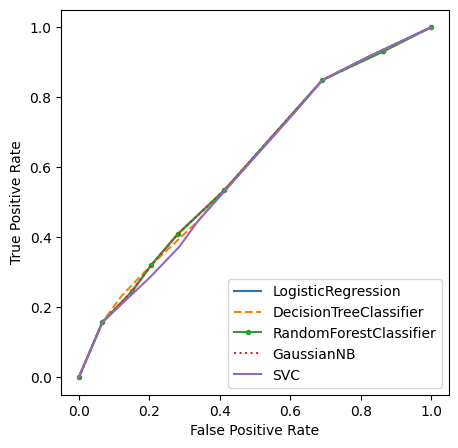

In [17]:
# 평가 도구
from sklearn.metrics import roc_curve, auc
# 차트 모양
plt.figure(figsize=(5,5))

# 반복
for key, (model, line_style) in acc.items():
    # 학습
    model.fit(X_train, y_train)
    # 예측 => [ F 예측확률, T 예측확률 ], ndarray
    pred = model.predict_proba(X_test)
    # T 예측확률만 사용 -> 추출
    pred_t = pred[:,-1]
    print(pred_t)
    # 성능평가
    fpr, tpr, _ = roc_curve(y_test.values, pred_t,)
    # 차트그리기
    plt.plot(fpr, tpr, line_style, label=key)
    # auc값 출력
    print(key, auc(fpr, tpr))
    #break

# 플로팅
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# 차트 출력
plt.show()

In [ ]:
RandomForestClassifier()